<a href="https://colab.research.google.com/github/KenyanGeek/Australian-birds-classifier/blob/master/Spectrogram_Code_16_beats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Here is the deep learning code for respirosa

In [2]:
# make your Google Drive accessible
from google.colab import drive
import os

drive.mount('/content/gdrive', force_remount=True)


Mounted at /content/gdrive
/content/gdrive/My Drive/4beats


In [0]:
from fastai.vision import *


In [50]:

import os
import numpy as np
import shutil
import random

# # Creating Train / Val / Test folders (One time use)
root_dir = '/content/gdrive/My Drive/16beats'
classes_dir = ['/60bpm', '/70bpm', '/75bpm', '/76bpm','/77bpm','/78bpm','/79bpm','/80bpm','/82bpm','/83bpm','/84bpm','/85bpm','/86bpm','/89bpm','/90bpm']

val_ratio = 0.20

for cls in classes_dir:
    os.makedirs(root_dir +'/train' + cls)
    os.makedirs(root_dir +'/val' + cls)


    # Creating partitions of the data after shuffeling
    src = root_dir + cls # Folder to copy images from

    allFileNames = os.listdir(src)
    np.random.shuffle(allFileNames)
    train_FileNames, val_FileNames = np.split(np.array(allFileNames),
                                                              [int(len(allFileNames)* (1 - val_ratio ))])


    train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
    val_FileNames = [src+'/' + name for name in val_FileNames.tolist()]

    print('Total images: '+ str(cls), len(allFileNames))
    print('Training: ', len(train_FileNames))
    print('Validation: ', len(val_FileNames))

    # Copy-pasting images
    for name in train_FileNames:
        shutil.copy(name, root_dir +'/train' + cls)

    for name in val_FileNames:
        shutil.copy(name, root_dir +'/val' + cls)


Total images: /60bpm 14
Training:  11
Validation:  3
Total images: /70bpm 17
Training:  13
Validation:  4
Total images: /75bpm 46
Training:  36
Validation:  10
Total images: /76bpm 11
Training:  8
Validation:  3
Total images: /77bpm 13
Training:  10
Validation:  3
Total images: /78bpm 60
Training:  48
Validation:  12
Total images: /79bpm 31
Training:  24
Validation:  7
Total images: /80bpm 42
Training:  33
Validation:  9
Total images: /82bpm 14
Training:  11
Validation:  3
Total images: /83bpm 17
Training:  13
Validation:  4
Total images: /84bpm 14
Training:  11
Validation:  3
Total images: /85bpm 46
Training:  36
Validation:  10
Total images: /86bpm 26
Training:  20
Validation:  6
Total images: /89bpm 28
Training:  22
Validation:  6
Total images: /90bpm 16
Training:  12
Validation:  4


In [0]:
path = '/content/gdrive/My Drive/16beats/'
img_size = 224
tfms = get_transforms(do_flip=False)
bs = 64
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, train='train', valid='val', size=img_size, bs = bs) 

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)


In [53]:
learn.fit(10)



epoch,train_loss,valid_loss,accuracy,time
0,3.458963,5.160812,0.080460,00:03
1,2.828331,4.849291,0.103448,00:03
2,2.446469,4.737757,0.229885,00:03
3,2.153223,4.289063,0.252874,00:03
4,1.883679,3.928246,0.275862,00:03
5,1.690319,3.487417,0.344828,00:03
6,1.539194,3.011508,0.367816,00:03
7,1.419189,2.430089,0.402299,00:03
8,1.295231,1.731323,0.482759,00:02
9,1.215475,1.093259,0.655172,00:03


In [54]:
interp = ClassificationInterpretation.from_learner(learn)


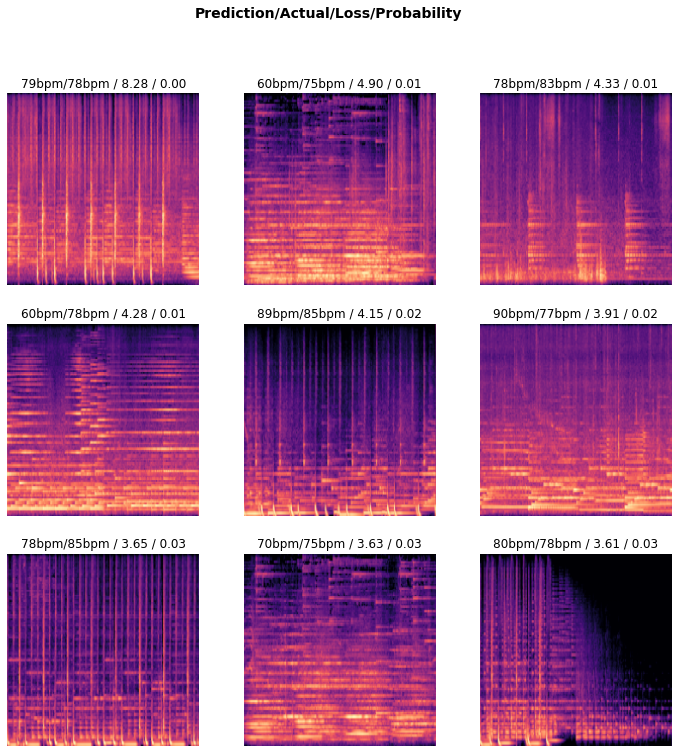

In [55]:
interp.plot_top_losses(9, figsize=(12,12) )


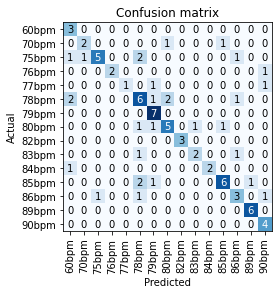

In [56]:
interp.plot_confusion_matrix()


In [57]:
interp.most_confused(min_val=2)


[('75bpm', '78bpm', 2),
 ('78bpm', '60bpm', 2),
 ('78bpm', '80bpm', 2),
 ('85bpm', '78bpm', 2)]